In [1]:
from ko_crawler import *
from ko_text import *

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
mk_crawler = MKNewsCrawler()
section_ls = ['경제', '기업', '사회', '국제', '부동산', '증권', '정치', 'IT과학', '문화']

## **MultiProcess 적용하여 크롤링**

In [4]:
start_page = 0
n_pages = 10

In [ ]:
import time

start_time = time.time()

result_dict = mk_crawler.multiple_crawl_process(section_ls = section_ls, start_page = start_page, n_pages= n_pages)

print(time.time() - start_time)

In [ ]:
len(set(result_dict['Title']))

In [ ]:
data = pd.DataFrame(result_dict)
data.shape

In [ ]:
data.to_csv('MKCrawler_total_data_page=%s~%s.csv'%(start_page, start_page + n_pages), index = False)

# MultiProcess 성능 비교

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5,1,'Crawling : Single vs Multi-process')

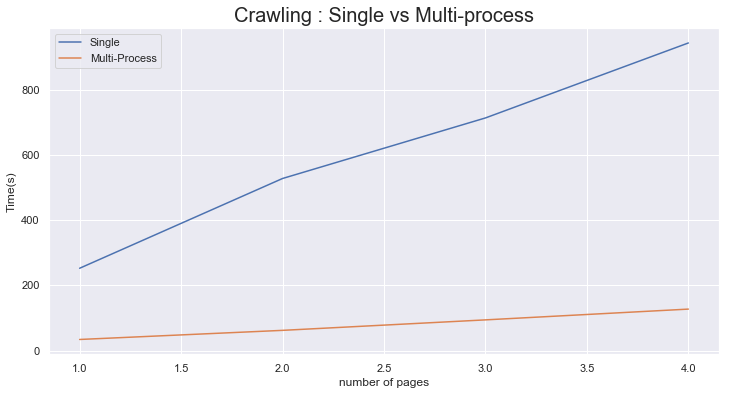

In [6]:
'''single_ls = []
multi_ls = []

for n in range(0,10):
    if n == 0:         continue
    
    # single
    start_time = time.time()
    mk_crawler.crawl_process(section = section_ls, start_page = 0, n_pages= n)
    single_ls.append(time.time() - start_time)
    
    # multiProcessing : n_jobs = 9
    start_time = time.time()
    mk_crawler.multiple_crawl_process(section_ls = section_ls, start_page = 0, n_pages= n)
    multi_ls.append(time.time() - start_time)
    '''

single_ls = [252.27537870407104, 527.4166266918182, 713.0279653072357, 942.8380105495453]
multi_ls = [33.95918846130371, 61.912436962127686, 94.03576683998108, 127.06047487258911]

plt.figure(figsize = (12,6))

plt.plot([1,2,3,4],single_ls, label = 'Single')
plt.plot([1,2,3,4],multi_ls, label = 'Multi-Process')
plt.legend(loc = 'best')

plt.xlabel('number of pages')
plt.ylabel('Time(s)')

plt.title('Crawling : Single vs Multi-process', fontsize = 20)
